# SDL 

# Car Price Prediction


### Dataset Link


https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

The columns in the given dataset is as follows:

1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df['Year']=df['Year'].apply(lambda x: 2020-x)
df['Kms_Driven']=df['Kms_Driven'].apply(lambda x:x/1000)

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,6,3.35,5.59,27.00,Petrol,Dealer,Manual,0
1,sx4,7,4.75,9.54,43.00,Diesel,Dealer,Manual,0
2,ciaz,3,7.25,9.85,6.90,Petrol,Dealer,Manual,0
3,wagon r,9,2.85,4.15,5.20,Petrol,Dealer,Manual,0
4,swift,6,4.60,6.87,42.45,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [7]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


In [8]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,6.372093,2.891554,2.00,4.0,6.0,8.000,17.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.000,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.900,92.6
Kms_Driven,301.0,36.947206,38.886884,0.50,15.0,32.0,48.767,500.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.000,3.0


## Exploratory Data Visualisation(EDA) 

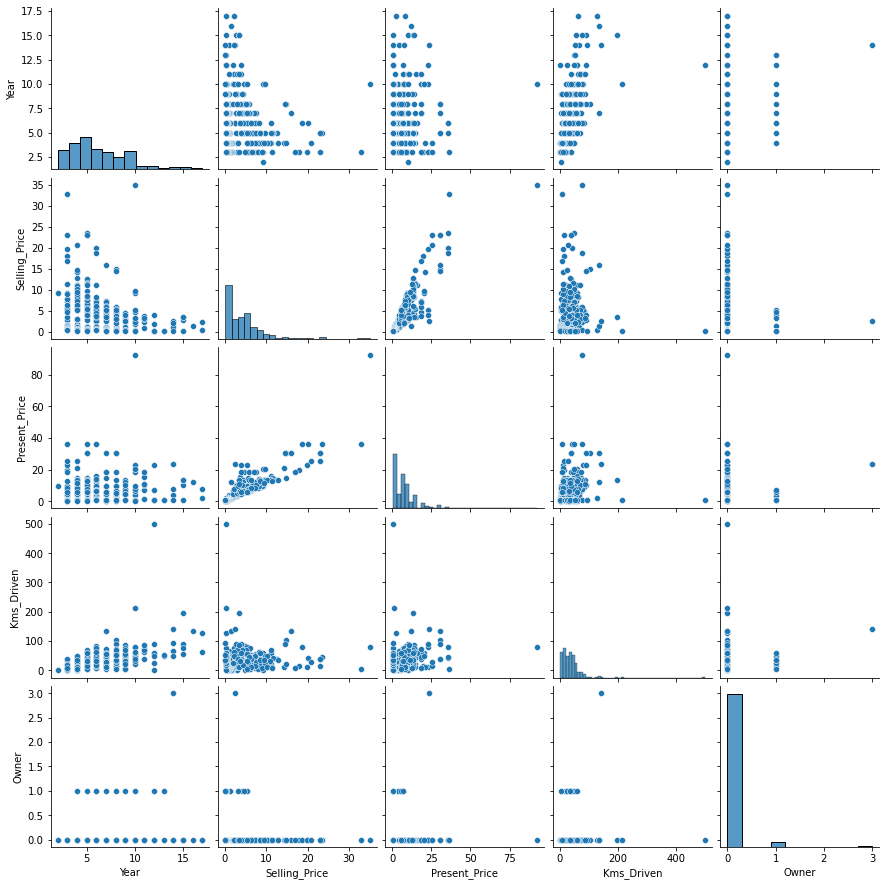

In [10]:
sns.pairplot(df)

<AxesSubplot:>

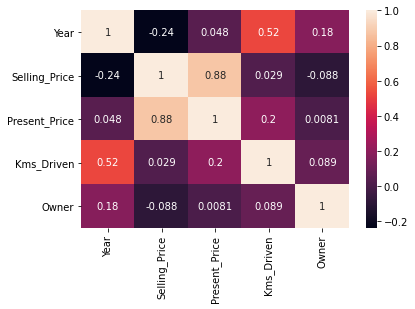

In [11]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

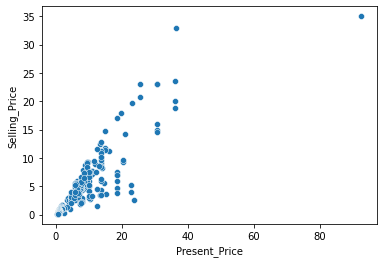

In [12]:
sns.scatterplot(data=df,x='Present_Price',y='Selling_Price')

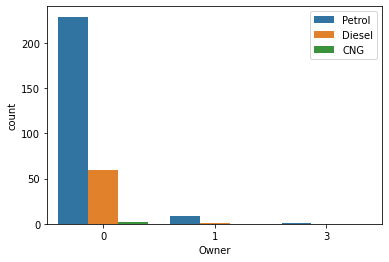

In [13]:
sns.countplot(data=df,x='Owner',hue='Fuel_Type')
plt.legend(loc='upper right')

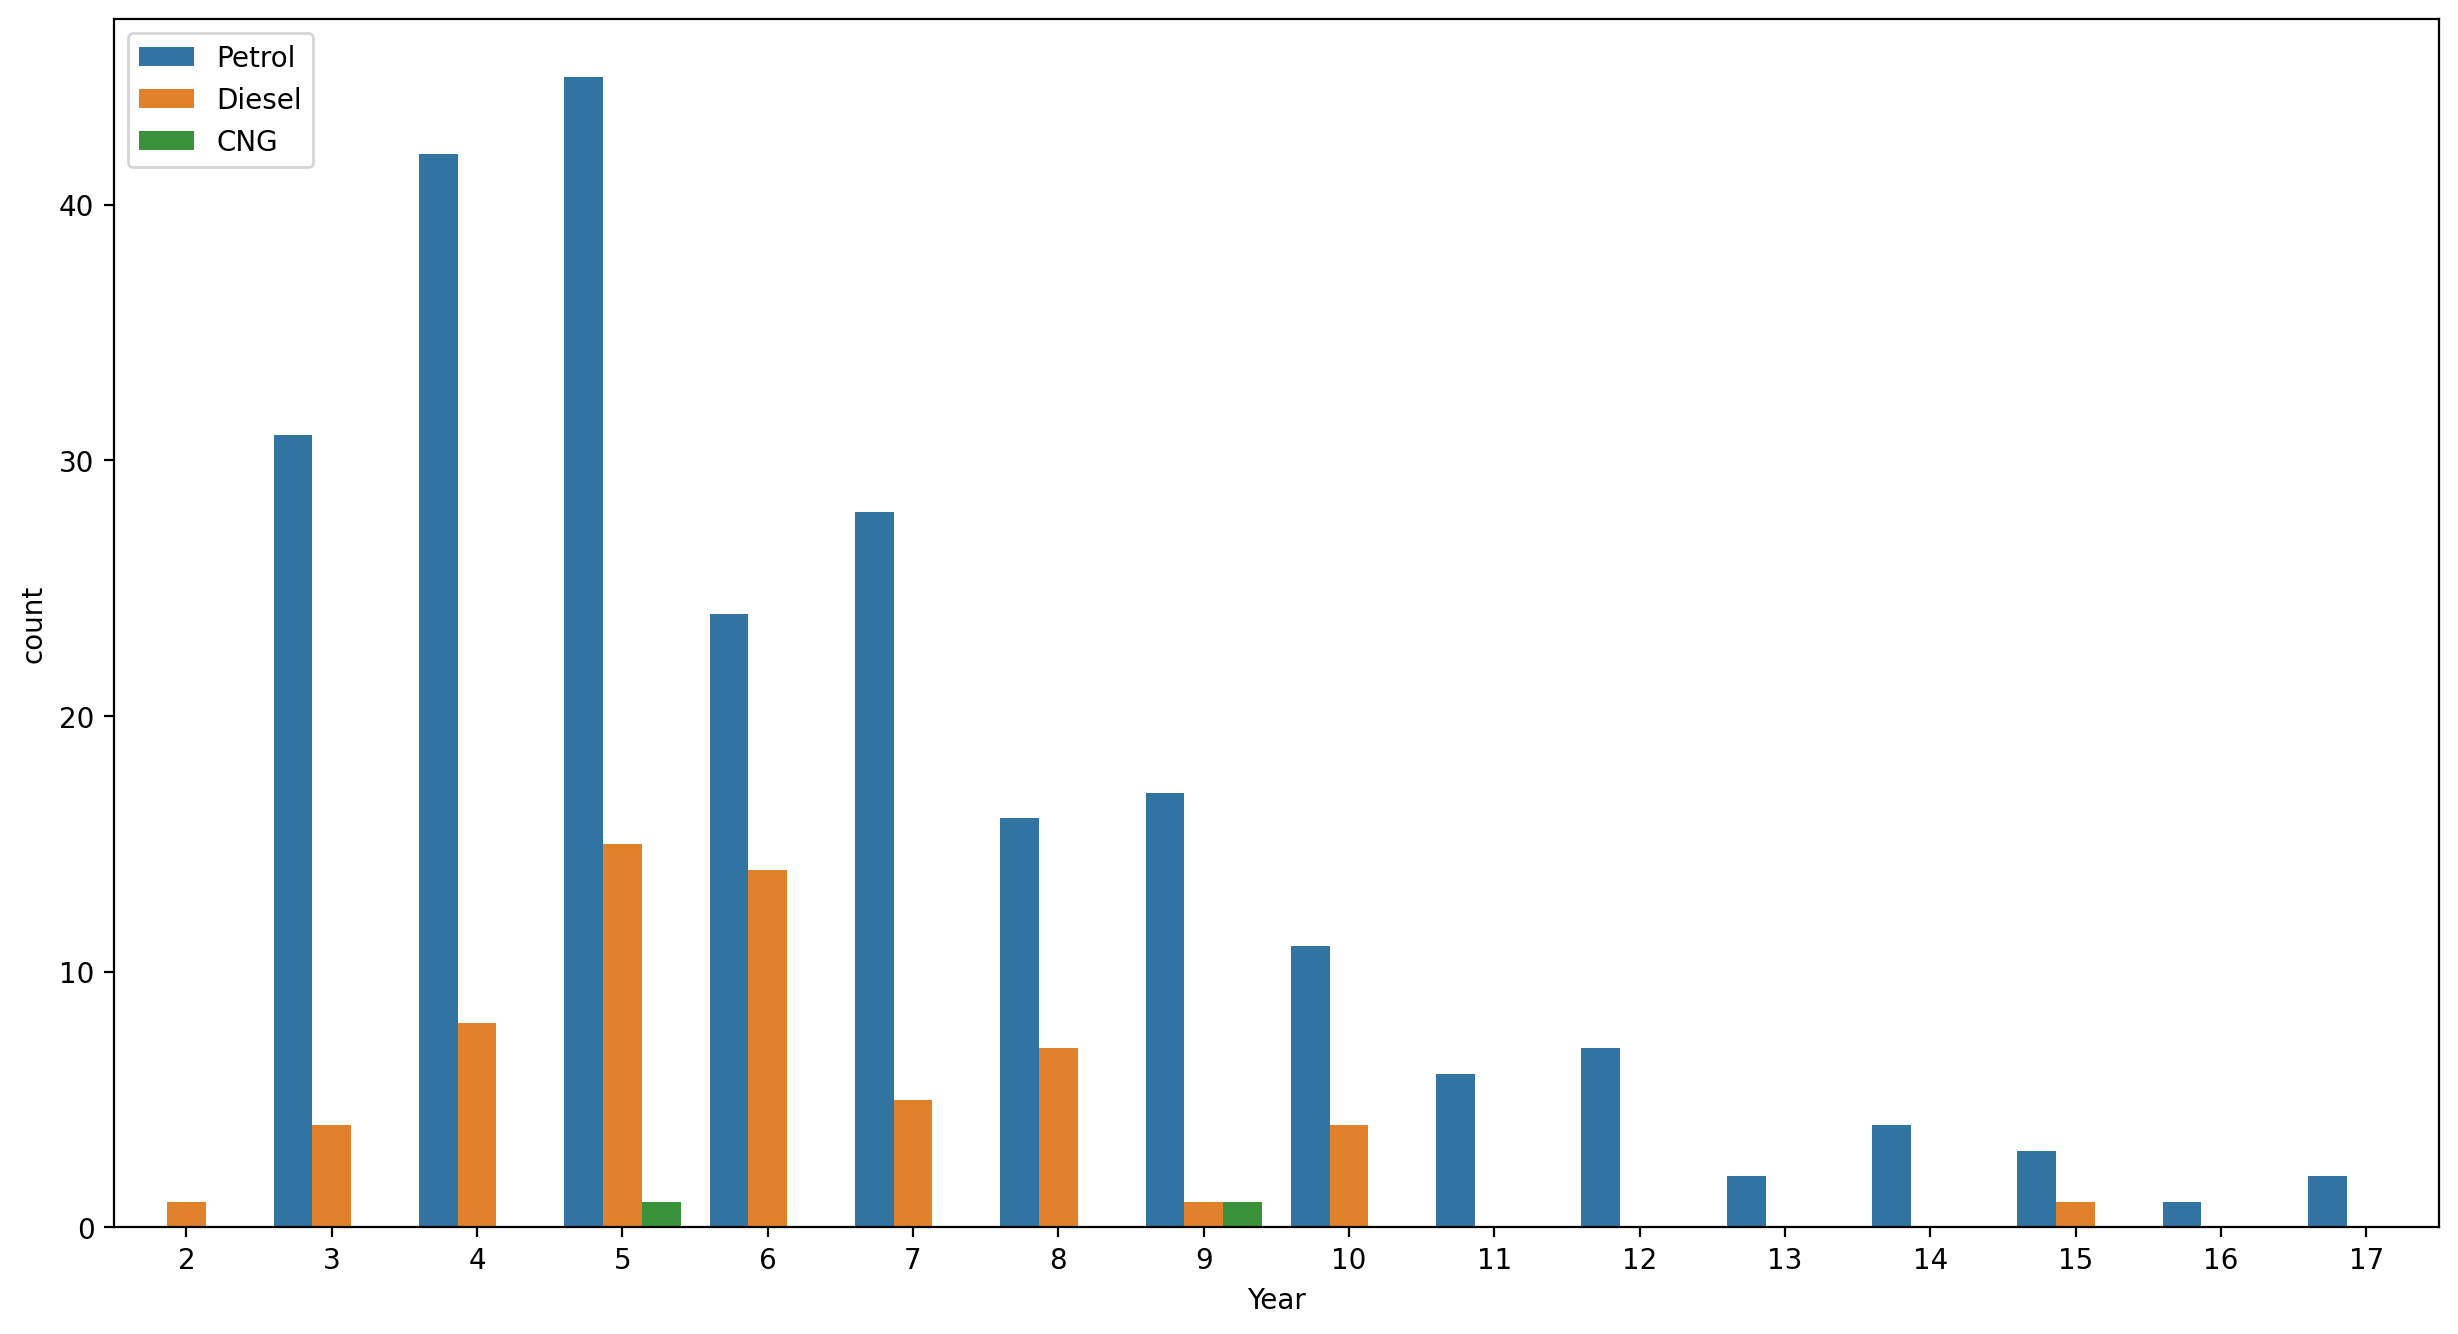

In [14]:
plt.figure(figsize=(15,8),dpi=200)
sns.countplot(data=df,x='Year',hue='Fuel_Type')
plt.legend(loc='upper left')

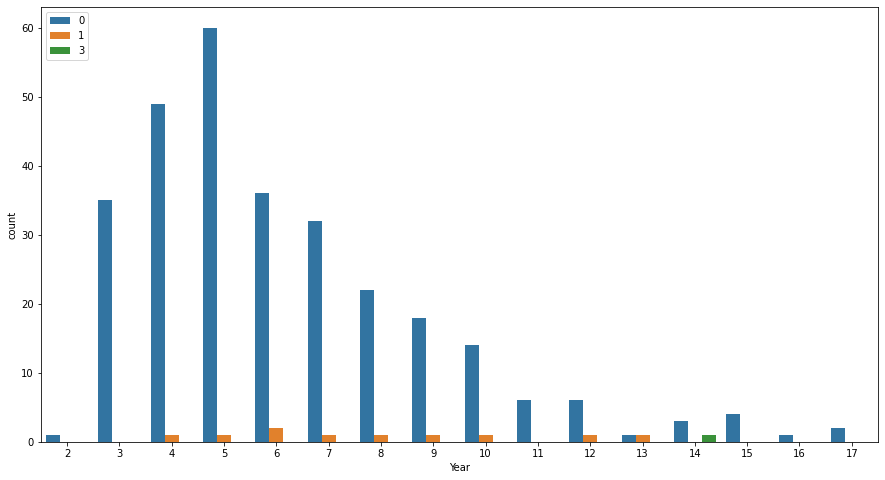

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Year',hue='Owner')
plt.legend(loc='upper left')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

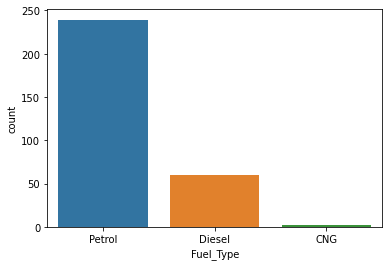

In [16]:
sns.countplot(data=df,x='Fuel_Type')

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

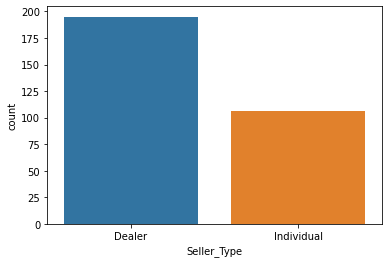

In [17]:
sns.countplot(data=df,x='Seller_Type')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

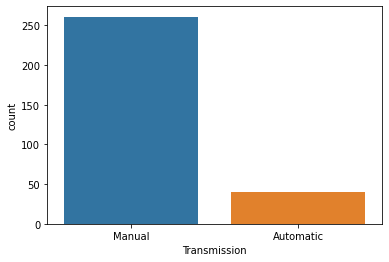

In [18]:
sns.countplot(data=df,x='Transmission')

<AxesSubplot:xlabel='Year', ylabel='count'>

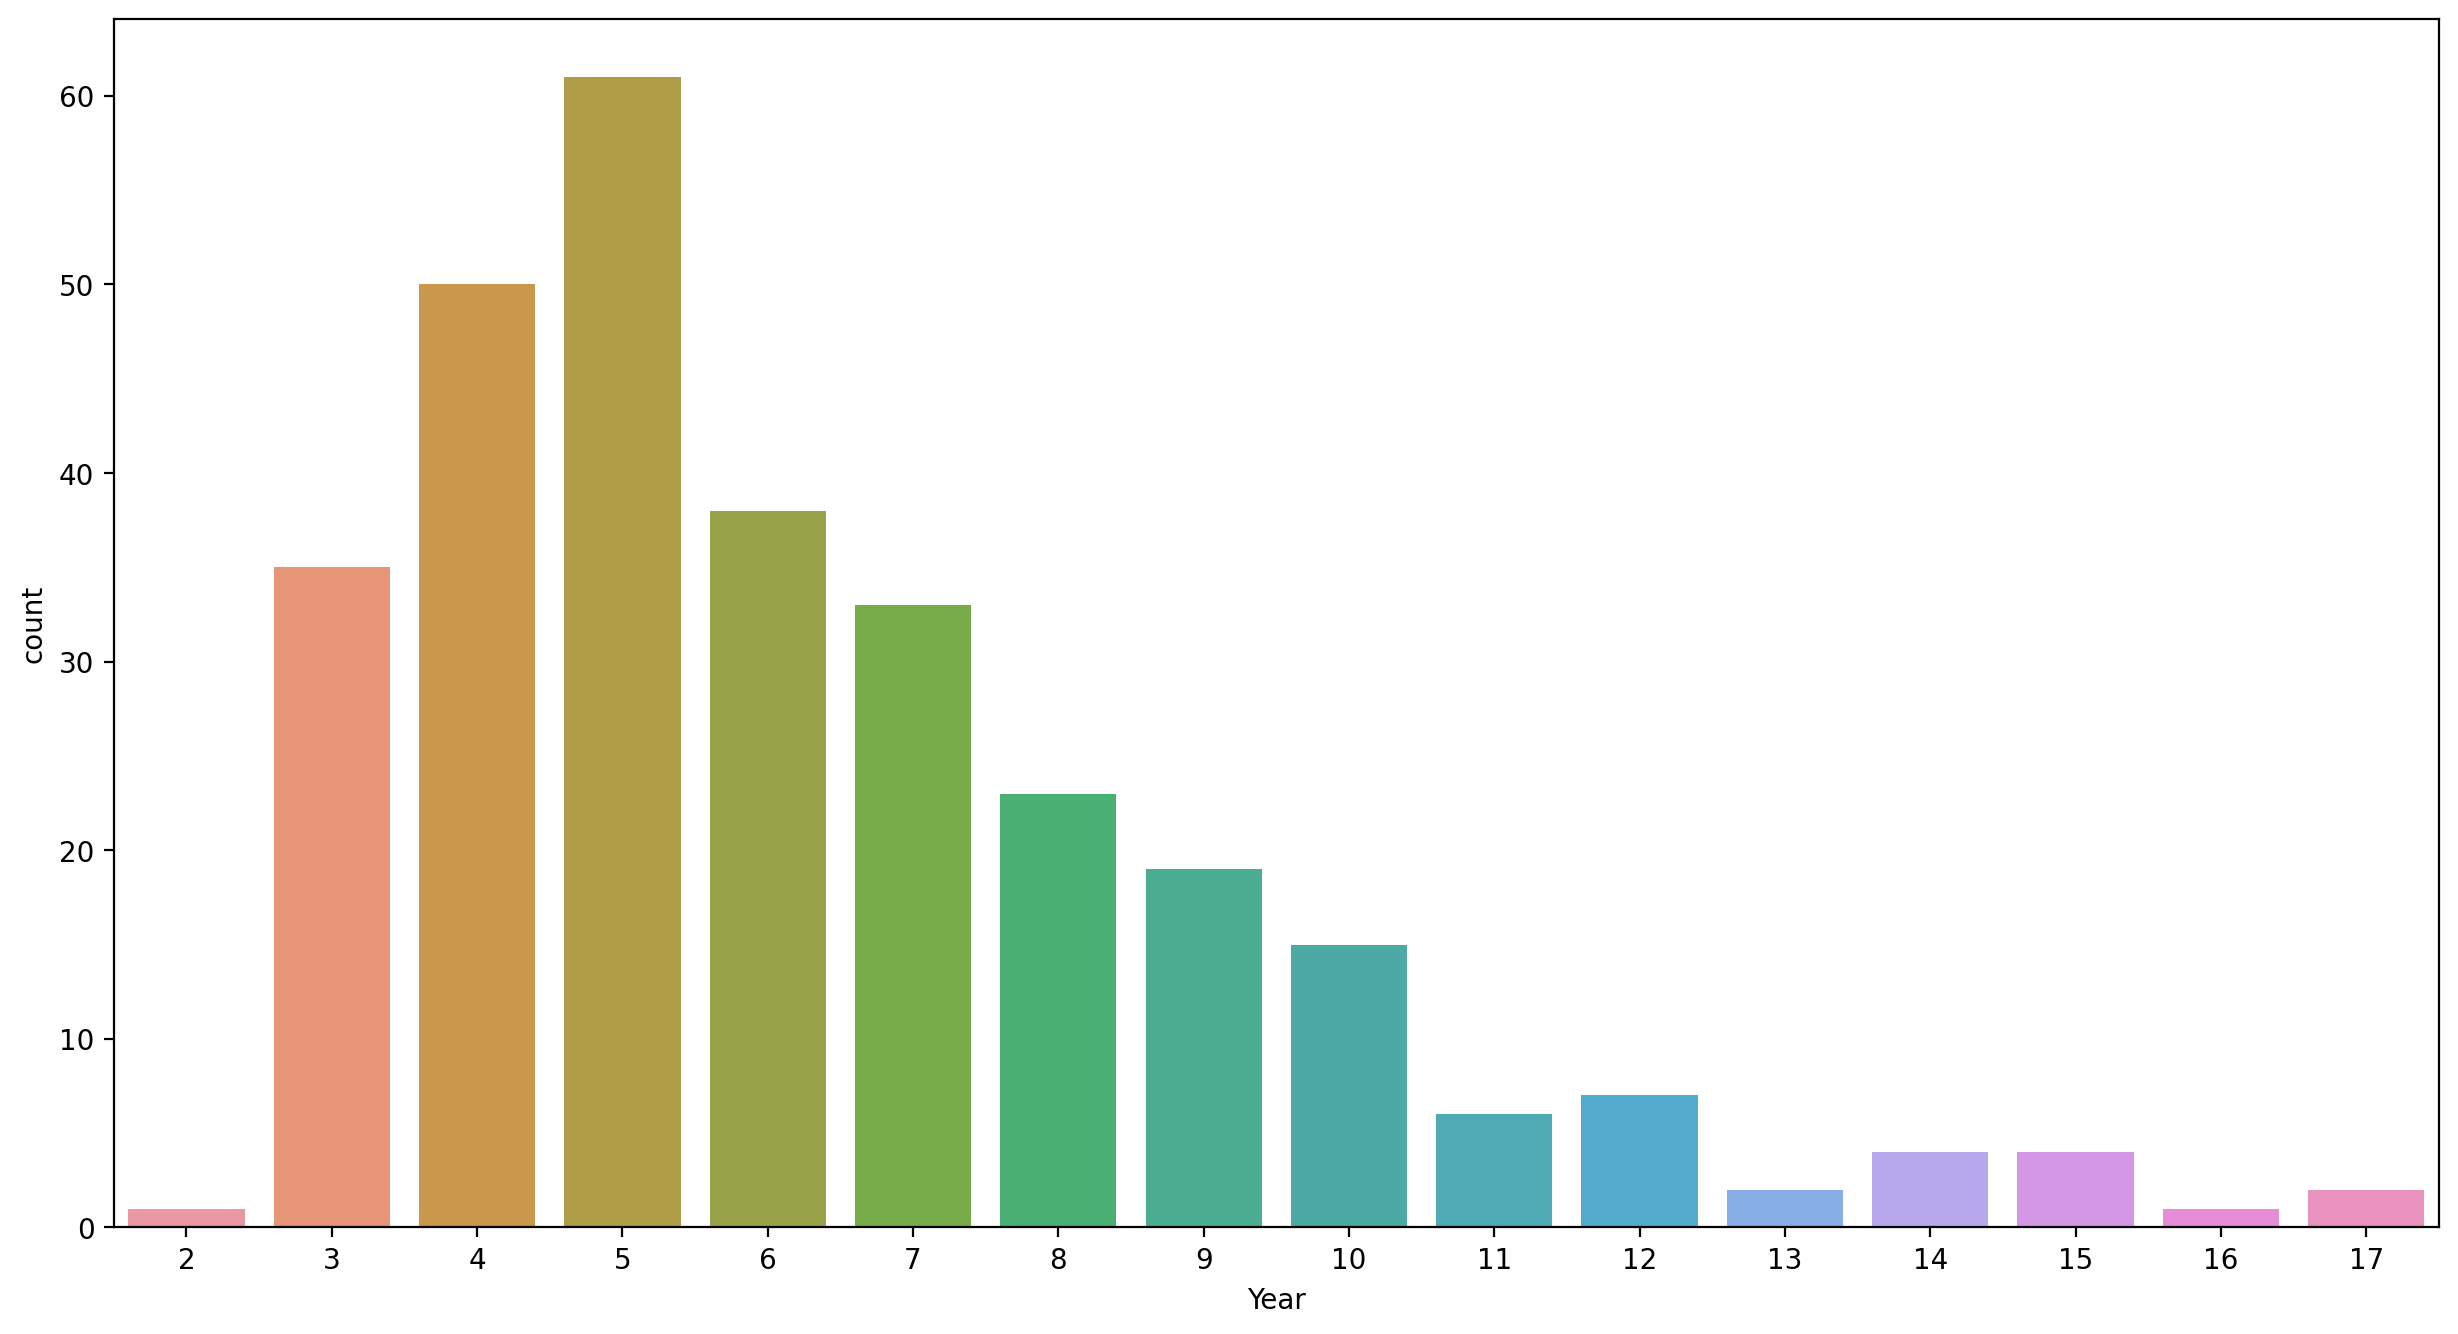

In [19]:
plt.figure(figsize=(15,8),dpi=200)
sns.countplot(data=df,x='Year')

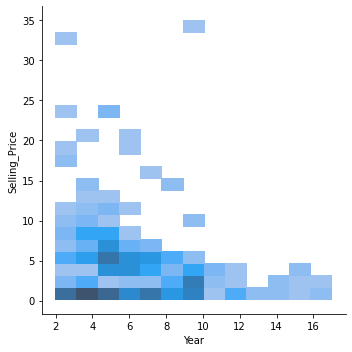

In [20]:
sns.displot(data=df,x='Year',y='Selling_Price')

<AxesSubplot:xlabel='Selling_Price', ylabel='Year'>

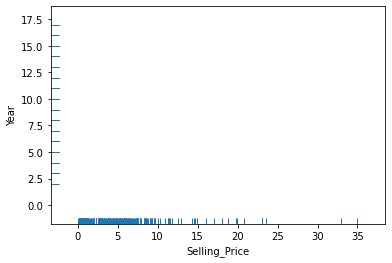

In [21]:
sns.rugplot(data=df,y='Year',x='Selling_Price')

C:\Users\shubh\anaconda3\envs\abc\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\anaconda3\envs\abc\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


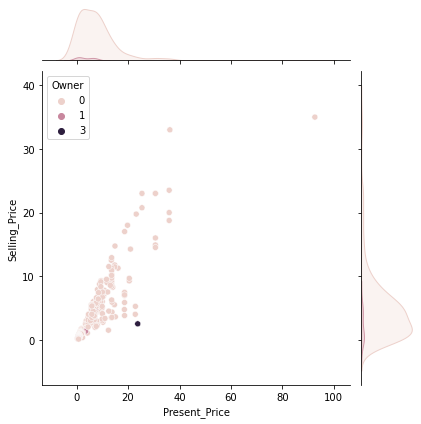

In [22]:
sns.jointplot(data=df,x='Present_Price',y='Selling_Price',hue='Owner')


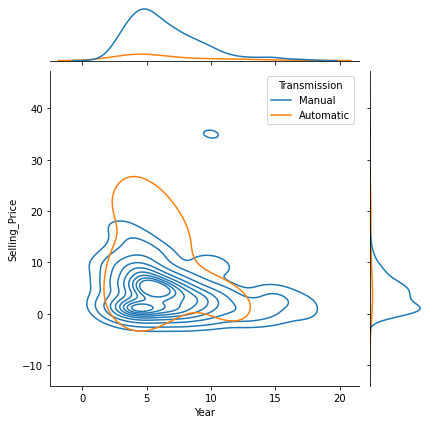

In [23]:
sns.jointplot(data=df,x='Year',y='Selling_Price',kind='kde',hue='Transmission')

In [24]:
import plotly
import plotly.graph_objs as go
import chart_studio.plotly
import plotly.tools
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
chart_studio.tools.set_credentials_file(username='akash_akku', api_key='YGNa5XgVzLc7UnNGcYbd')
print(__version__)

ModuleNotFoundError: No module named 'chart_studio'

C:\Users\shubh\anaconda3\envs\abc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\anaconda3\envs\abc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Owner'>

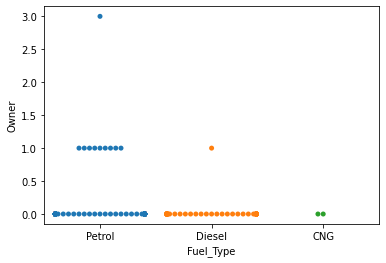

In [26]:
sns.swarmplot(data=df,y='Owner',x='Fuel_Type')

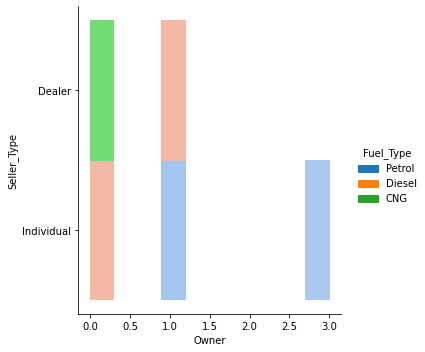

In [27]:
sns.displot(data=df,y='Seller_Type',x='Owner',hue='Fuel_Type')

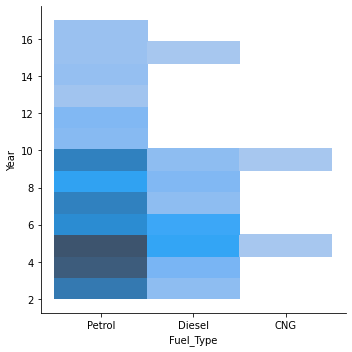

In [28]:
sns.displot(data=df,x='Fuel_Type',y='Year')

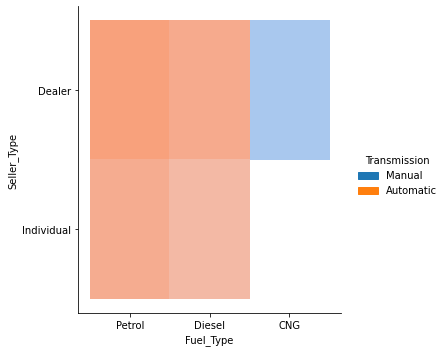

In [29]:
sns.displot(data=df,y='Seller_Type',x='Fuel_Type',hue='Transmission')

<AxesSubplot:xlabel='Owner', ylabel='Year'>

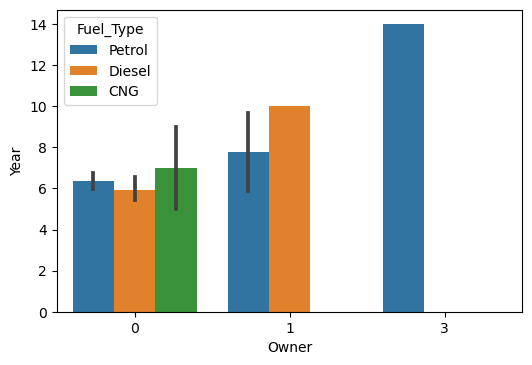

In [30]:
plt.figure(dpi=100)
sns.barplot(data=df,y='Year',x='Owner',hue='Fuel_Type')

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [33]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Owner']=le.fit_transform(df['Owner'])
df['Transmission']=le.fit_transform(df['Transmission'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])

In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,6,3.35,5.59,27.00,2,0,1,0
1,sx4,7,4.75,9.54,43.00,1,0,1,0
2,ciaz,3,7.25,9.85,6.90,2,0,1,0
3,wagon r,9,2.85,4.15,5.20,2,0,1,0
4,swift,6,4.60,6.87,42.45,1,0,1,0


### Training And Testing Data

In [35]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [36]:
X=df[['Year', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y=df['Selling_Price']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

### Model Training

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
#Accuracy of Training data
lr.score(X_train,y_train)

0.8838362674048074

In [44]:
#Predicting results
pred=lr.predict(X_test)

In [45]:
intercept=lr.intercept_
intercept

8.225948829219297

In [46]:
slope=lr.coef_

In [47]:
slope

array([-0.38570171,  0.4394632 , -0.00497683, -1.32651222, -1.20811584,
       -1.61620601, -0.93387338])

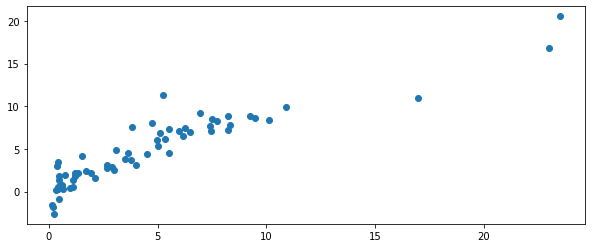

In [49]:
plt.figure(figsize=(10,4))
plt.scatter(y_test,pred)

In [50]:
from sklearn import metrics

In [51]:
metrics.mean_absolute_error(y_test,pred)

1.2528749290467873

In [52]:
metrics.mean_squared_error(y_test,pred)

3.506701841679328

In [53]:
data={'Actual':y_test,'Predicted':pred}
de=pd.DataFrame(data)

In [55]:
de.head()

,Actual,Predicted
177,0.35,2.953052
289,10.11,8.335966
228,4.95,6.029961
198,0.15,-1.580281
60,6.95,9.236138
